In [1]:
#Nordic Sea Map - April 2022
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
import gsw
import colorcet as cc

import yaml

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config["data_dir"] = '/home1/datahome/mlejeune/cartopy_shapefiles'


os.getcwd

<function posix.getcwd()>

In [2]:
%%time
with open(r'/home1/datahome/mlejeune/configuration.yaml') as file:
    configuration = yaml.load(file, Loader=yaml.FullLoader)

    print("File version: ", configuration["version"])
    
#Mappign stuff
proj=ccrs.NorthPolarStereo()
land_feature = cfeature.NaturalEarthFeature(
category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
extent = np.array([17, -30, 50, 85])
subplot_kw = {'projection': proj, 'extent': extent}


File version:  0.1
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 5.7 ms


In [3]:
ds = xr.open_dataset(configuration['CORA_OUTPUT'] + configuration['CORA_FILE_NAME'])

dsub = ds.where((ds['LONGITUDE']>=configuration['longitude1']) & (ds['LONGITUDE']<=configuration['longitude2']) & (ds['LATITUDE']>=configuration['latitude2']) & 
              (ds['LATITUDE']<=configuration['latitude1']), drop=True)
ds = dsub #global or local

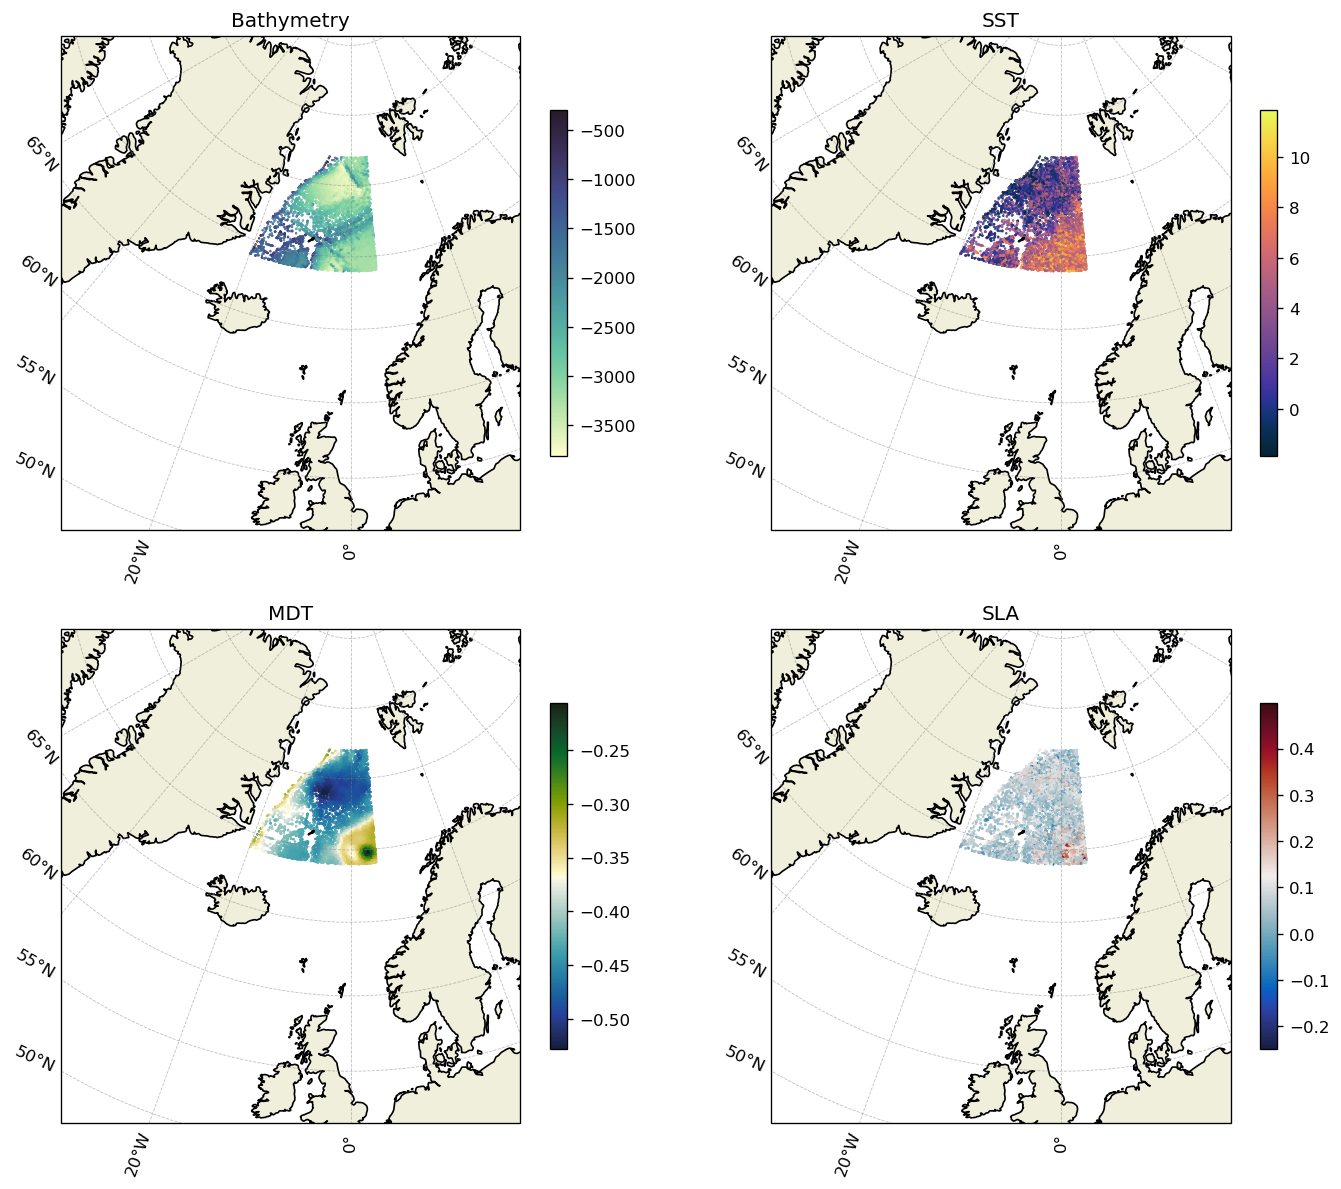

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 12), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)
te = ax[0,0].scatter(ds.LONGITUDE,ds.LATITUDE,c = ds.bathy,transform=ccrs.PlateCarree(), s = .2,cmap = cmocean.cm.deep)
cbar = plt.colorbar(te, ax=ax[0,0], shrink=0.7)
ax[0,0].set_title('Bathymetry')

te = ax[0,1].scatter(ds.LONGITUDE,ds.LATITUDE,c = ds.SST,transform=ccrs.PlateCarree(), s = .2,cmap = cmocean.cm.thermal)
cbar = plt.colorbar(te, ax=ax[0,1], shrink=0.7)
ax[0,1].set_title('SST')

te = ax[1,0].scatter(ds.LONGITUDE,ds.LATITUDE,c = ds.MDT,transform=ccrs.PlateCarree(), s = .2,cmap = cmocean.cm.delta)
cbar = plt.colorbar(te, ax=ax[1,0], shrink=0.7)
ax[1,0].set_title('MDT')

te = ax[1,1].scatter(ds.LONGITUDE,ds.LATITUDE,c = ds.SLA,transform=ccrs.PlateCarree(), s = .2,cmap = cmocean.cm.balance)
cbar = plt.colorbar(te, ax=ax[1,1], shrink=0.7)
ax[1,1].set_title('SLA')

for i in np.arange(2):
    for j in np.arange(2):
        ax[i,j].add_feature(land_feature, edgecolor='black')
        gl = ax[i,j].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,linewidth=.5, color='gray', alpha=0.5, linestyle='--')
        gl.top_labels = False
        gl.right_labels = False